In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from sklearn.feature_selection import RFECV

In [2]:
data = pd.read_csv("../../heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
pd.isnull(data).values.any()

False

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

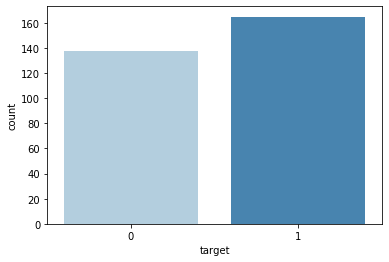

In [7]:
# target variable counts
sns.countplot(x="target", data=data, palette="Blues")

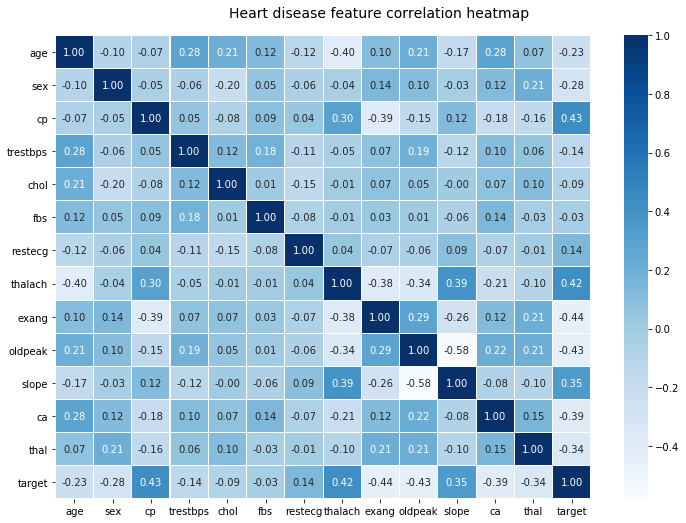

In [14]:
# Feature correlation matrix Heatmap
f, ax = plt.subplots(figsize=(12, 8))
corr = data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="Blues",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Heart disease feature correlation heatmap', fontsize=14)

In [16]:
# separating X and y variables
X = data.drop(['target'], axis=1)
y = data['target']

In [17]:
X.shape, y.shape

((303, 13), (303,))

In [18]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [20]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [21]:
# separating the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [22]:
# SVM classifier
svm_clf = SVC(kernel="linear")
svm_clf.fit(X_train, y_train)

SVC(kernel='linear')

In [23]:
y_pred = svm_clf.predict(X_test)

In [24]:
# accuracy before balancing the dataset
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8241758241758241


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.76      0.81        46
           1       0.78      0.89      0.83        45

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



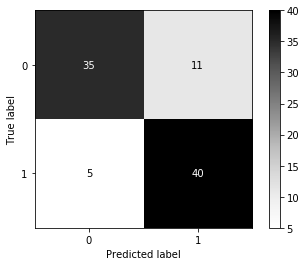

In [26]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm_clf, X_test, y_test, cmap=plt.cm.Greys)
plt.show()

In [28]:
# feature selection with recursive feature selection with cross validation

In [29]:
rfe_cv = RFECV(estimator=svm_clf, step=1, cv=5, scoring="accuracy")
rfe_cv = rfe_cv.fit(X_train, y_train)

In [36]:
print("Optimal number of features: ", rfe_cv.n_features_)
print("Best features: ", X_train.columns[rfe_cv.support_])

Optimal number of features:  13
Best features:  Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [37]:
rfe_cv.grid_scores_

array([0.75968992, 0.7406423 , 0.74994463, 0.77364341, 0.78792913,
       0.78792913, 0.81151717, 0.80199336, 0.80199336, 0.80664452,
       0.79712071, 0.81627907, 0.82104097])

In [38]:
rfe_cv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [44]:
new_data = data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']]

In [45]:
new_data.shape

(303, 14)

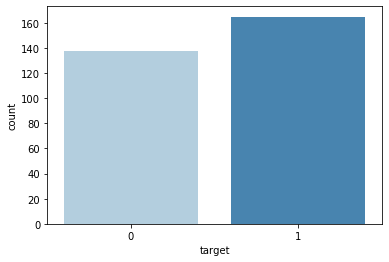

In [47]:
sns.countplot(x="target", data=new_data, palette="Blues")

In [48]:
# separating X and y variables
X_new = new_data.drop(['target'], axis=1)
y_new = new_data['target']

In [49]:
X_new.shape, y_new.shape

((303, 13), (303,))

In [50]:
X_new

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [51]:
y_new

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [52]:
# separating the dataset into training and testing data
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, random_state=100)

In [53]:
# svm classifier after balancing the target classes
svm_clf.fit(X_train_new, y_train_new)

SVC(kernel='linear')

In [54]:
y_pred_new = svm_clf.predict(X_test_new)

In [55]:
# accurcay with 2 dimensions from PCA
print("Accuracy:",metrics.accuracy_score(y_test_new, y_pred_new))

Accuracy: 0.8241758241758241


In [56]:
print(classification_report(y_test_new, y_pred_new))

              precision    recall  f1-score   support

           0       0.88      0.76      0.81        46
           1       0.78      0.89      0.83        45

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91

